In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('claimants.csv')

In [3]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [4]:
df.shape

(1340, 7)

In [5]:
df.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [6]:
df.dropna(inplace=True)

In [7]:
x=df.drop(labels=['CASENUM', 'ATTORNEY'], axis=1)

In [8]:
y=df[['ATTORNEY']]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)

In [10]:
x_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
403,0.0,1.0,0.0,10.0,50.000
835,1.0,1.0,0.0,30.0,0.300
1285,1.0,1.0,0.0,40.0,0.050
819,1.0,1.0,1.0,0.0,3.089
1314,0.0,1.0,0.0,7.0,0.107
...,...,...,...,...,...
493,1.0,1.0,0.0,15.0,3.085
288,0.0,1.0,0.0,6.0,0.708
92,1.0,1.0,0.0,8.0,0.860
163,1.0,1.0,0.0,18.0,4.089


In [11]:
model=DecisionTreeClassifier()

In [12]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred_train = model.predict(x_train)

In [14]:
accuracy_score(y_train, y_pred_train)

0.9975669099756691

In [15]:
y_pred_test = model.predict(x_test)

In [16]:
accuracy_score(y_test, y_pred_test)

0.6715328467153284

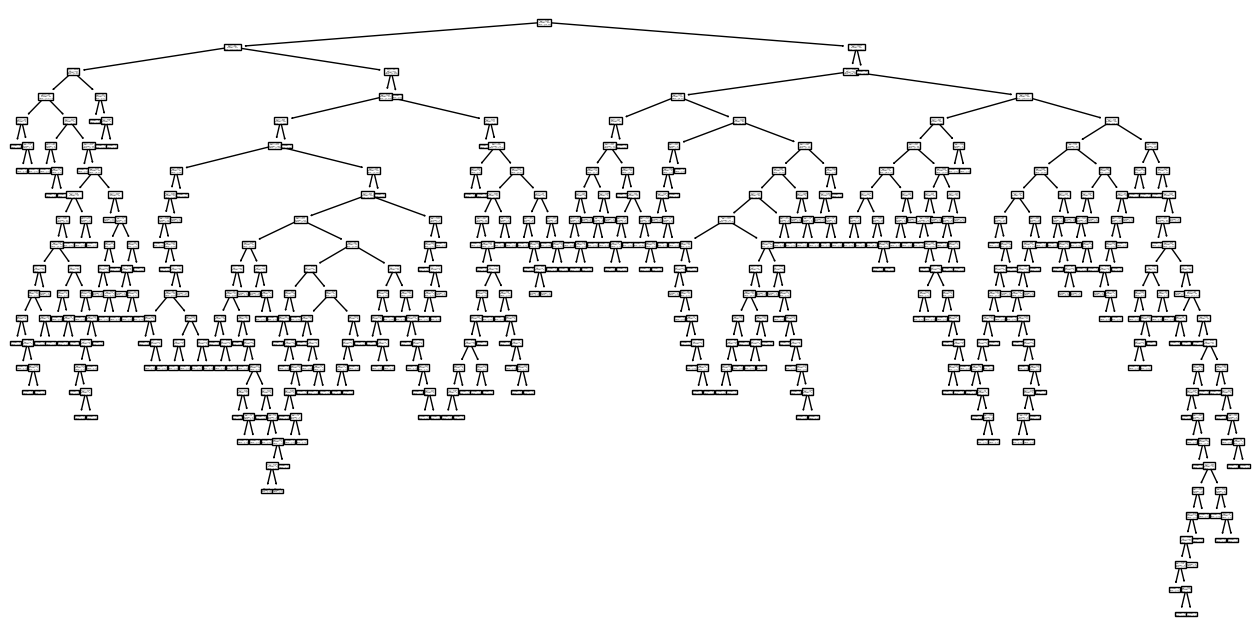

In [17]:
plt.figure(figsize=(16, 8))
plot_tree(model)
plt.show()

In [18]:
model_1 = DecisionTreeClassifier(max_depth=5)

In [19]:
model_1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

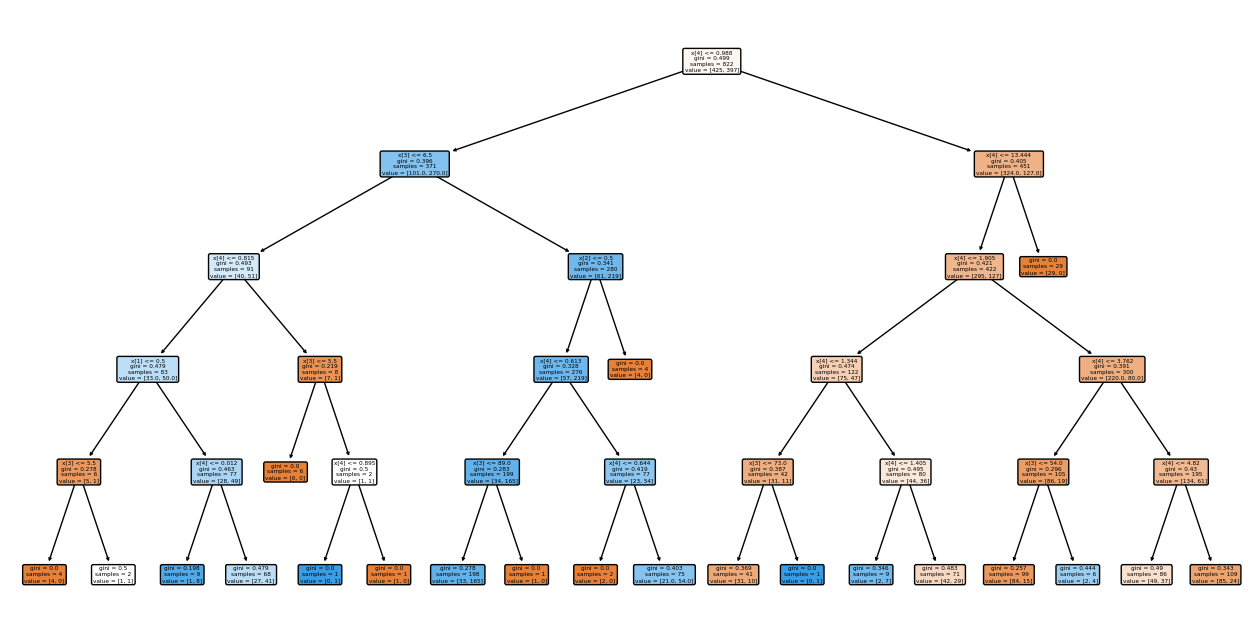

In [20]:
plt.figure(figsize=(16, 8))
plot_tree(model_1, filled=True, rounded=True)
plt.show()

In [21]:
y_pred_train = model_1.predict(x_train)

In [22]:
accuracy_score(y_train, y_pred_train)

0.754257907542579

In [23]:
y_pred_test = model_1.predict(x_test)

In [24]:
accuracy_score(y_test, y_pred_test)

0.7226277372262774

# GridSearch CV

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
grid_search = GridSearchCV(estimator=model, param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2,3,4,5,6,7,8,9]}, cv=5)

In [28]:
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]})

In [29]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [30]:
grid_search.best_score_

0.7326400996264011